## Задача


Мне нужно показать:

1) сколько всего разных лиц помимо ЧМПЗ выпускают продукцию с обозначением "Губернская"

2) Какую долю в общей массе иных производителей составляет продукция ЧМПЗ

3) Сколько лиц и кг произведено до даты приоритета товарных знаков "Губернская", "Губернские"


## Предполагаемый алгоритм

1. выбираем отдельно Губернский, Губернская и Губернские в поле "Наименование продукции"
2. Далее выбираем все уникальные записи в поле "Наименование продукции"
3. Далее суммируем количество килограмм по уникальной продукции за весь период из поля "Объем"
4. Далее берем дату первой и последней транзакции с уникальным товаром из поля "Дата сертификата"
5. Далее берем наименование лица из поля "Площадка" и его ИНН из поля "ИНН ХС"


## Формат выдачи


формируем таблицу в Экселе со следующими полями:

1. Лицо
2. ИНН
3. Продукт
4. Дата первой транзакции
5. Дата последней транзакции
6. Сумма килограммов по данному товару данного лица


## Решение

In [23]:
import pandas as pd

Типизирую ИНН как строку, чтобы не съедались нули в первой позиции


In [24]:
basic = pd.read_excel('122110_Производство_с_наименованием_продукции_Губернские.xlsx', dtype={'ИНН ХС-отправителя': str})

In [25]:
basic

,Уникальный идентификатор сертификата (uuid),ID сертификата,Дата сертификата,Статус сертификата,Тип сертификата,ХС-отправитель,ИНН ХС-отправителя,Площадка-отправитель,Номер площадки-отправителя,Регион отгрузки,...,ИНН ХС-получателя,Площадка-получатель,Номер площадки-получателя,Регион доставки,Тип продукции,Продукция,Вид продукции,Наименование продукции,Объем,Единица измерения
0,dc952ed4-b760-41bb-ab6d-1e60aba793c4,160356304,2017-12-11 02:10:21,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Ребра Губернские к/в (газ),1.764,кг
1,c4902a75-eb1a-4749-abd2-22869689536f,160359584,2017-12-11 02:18:49,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Ребра Губернские к/в (газ),1.627,кг
2,16ce7424-d2dd-42c4-99f0-a53cdad54bc3,160359729,2017-12-11 02:19:11,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Карбонад Губернский к/в (п/вак),1.614,кг
3,41b82363-2b1e-4478-a0c9-8fb478ec2c83,160359834,2017-12-11 02:19:38,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Шейка Губернская к/в (п/вак),2.185,кг
4,ad54c32c-9204-4a0d-8a44-6bd58723c456,160365298,2017-12-11 02:32:55,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Карбонад Губернский к/в (п/вак),3.910,кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284349,1ffbf075-7d16-4f10-99ef-022d7d1386bd,27093522682,2024-12-16 16:00:29,Оформлен,Производственный,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ЧЕРКИЗОВСКИЙ МЯСОПЕРЕРАБ...",7718013714,"Ульяновский филиал АО ""Черкизовский мясоперера...",RU73:96029389,Ульяновская область,...,7718013714,"Ульяновский филиал АО ""Черкизовский мясоперера...",RU73:96029389,Ульяновская область,Пищевые продукты,готовая продукция из мяса птицы,готовые пищевые продукты из мяса птицы,"Изделие колбасное из мяса кур вареное, охлажде...",270.000,кг
284350,2c2019cd-c15d-44c8-865f-83aeef23eaa4,27095600545,2024-12-16 19:48:55,Оформлен,Производственный,ХАБИБУЛЛИН ИННОКЕНТИЙ ЗАРИФУЛЛОВИЧ,246410058422,ИП Хабибуллин Иннокентий Зарифуллович,RU024:61327585,Красноярский край,...,246410058422,ИП Хабибуллин Иннокентий Зарифуллович,RU024:61327585,Красноярский край,Пищевые продукты,готовые мясные продукты,готовые мясные продукты,"Сервелат ""Губернский"" 0,600 кг",7.200,кг
284351,25566fc8-6f3f-4960-8a37-13100639264a,27096053605,2024-12-16 20:39:14,Оформлен,Производственный,КОНДРАТЕНКО СТАНИСЛАВ ОЛЕГОВИЧ,262102490440,"ИП Кондратенко Станислав Олегович, МПП ""Арнис""",RU26:93550566,Ставропольский край,...,262102490440,"ИП Кондратенко Станислав Олегович, МПП ""Арнис""",RU26:93550566,Ставропольский край,Пищевые продукты,готовые мясные продукты,готовые мясные продукты,"Сосиски ""Губернские""б/в",42.000,кг
284352,6373304e-192e-43ae-9d3c-7b3d93f4f328,27096053600,2024-12-16

In [26]:
len(basic)

284354

In [27]:
gub_filtered=basic[basic['Наименование продукции'].str.contains('губернский|губернская|Губернские|Губернское', case=False, na=False)]

In [28]:
gub_filtered

,Уникальный идентификатор сертификата (uuid),ID сертификата,Дата сертификата,Статус сертификата,Тип сертификата,ХС-отправитель,ИНН ХС-отправителя,Площадка-отправитель,Номер площадки-отправителя,Регион отгрузки,...,ИНН ХС-получателя,Площадка-получатель,Номер площадки-получателя,Регион доставки,Тип продукции,Продукция,Вид продукции,Наименование продукции,Объем,Единица измерения
0,dc952ed4-b760-41bb-ab6d-1e60aba793c4,160356304,2017-12-11 02:10:21,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Ребра Губернские к/в (газ),1.764,кг
1,c4902a75-eb1a-4749-abd2-22869689536f,160359584,2017-12-11 02:18:49,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Ребра Губернские к/в (газ),1.627,кг
2,16ce7424-d2dd-42c4-99f0-a53cdad54bc3,160359729,2017-12-11 02:19:11,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Карбонад Губернский к/в (п/вак),1.614,кг
3,41b82363-2b1e-4478-a0c9-8fb478ec2c83,160359834,2017-12-11 02:19:38,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Шейка Губернская к/в (п/вак),2.185,кг
4,ad54c32c-9204-4a0d-8a44-6bd58723c456,160365298,2017-12-11 02:32:55,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,...,3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Карбонад Губернский к/в (п/вак),3.910,кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284349,1ffbf075-7d16-4f10-99ef-022d7d1386bd,27093522682,2024-12-16 16:00:29,Оформлен,Производственный,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ЧЕРКИЗОВСКИЙ МЯСОПЕРЕРАБ...",7718013714,"Ульяновский филиал АО ""Черкизовский мясоперера...",RU73:96029389,Ульяновская область,...,7718013714,"Ульяновский филиал АО ""Черкизовский мясоперера...",RU73:96029389,Ульяновская область,Пищевые продукты,готовая продукция из мяса птицы,готовые пищевые продукты из мяса птицы,"Изделие колбасное из мяса кур вареное, охлажде...",270.000,кг
284350,2c2019cd-c15d-44c8-865f-83aeef23eaa4,27095600545,2024-12-16 19:48:55,Оформлен,Производственный,ХАБИБУЛЛИН ИННОКЕНТИЙ ЗАРИФУЛЛОВИЧ,246410058422,ИП Хабибуллин Иннокентий Зарифуллович,RU024:61327585,Красноярский край,...,246410058422,ИП Хабибуллин Иннокентий Зарифуллович,RU024:61327585,Красноярский край,Пищевые продукты,готовые мясные продукты,готовые мясные продукты,"Сервелат ""Губернский"" 0,600 кг",7.200,кг
284351,25566fc8-6f3f-4960-8a37-13100639264a,27096053605,2024-12-16 20:39:14,Оформлен,Производственный,КОНДРАТЕНКО СТАНИСЛАВ ОЛЕГОВИЧ,262102490440,"ИП Кондратенко Станислав Олегович, МПП ""Арнис""",RU26:93550566,Ставропольский край,...,262102490440,"ИП Кондратенко Станислав Олегович, МПП ""Арнис""",RU26:93550566,Ставропольский край,Пищевые продукты,готовые мясные продукты,готовые мясные продукты,"Сосиски ""Губернские""б/в",42.000,кг
284352,6373304e-192e-43ae-9d3c-7b3d93f4f328,27096053600,2024-12-16

In [29]:
len(gub_filtered)

284068

По первому вхождению даты сертификата

In [30]:
df_grouped = gub_filtered.groupby('Наименование продукции').agg({
    'Объем': 'sum',
    'Площадка-отправитель': 'first',
    'ИНН ХС-отправителя': 'first',
    'Дата сертификата': 'first',
}).reset_index()


In [31]:
df_grouped

,Наименование продукции,Объем,Площадка-отправитель,ИНН ХС-отправителя,Дата сертификата
0,"""Грудинка ""Губернская"" к/в""",1075.000,Общество с ограниченной ответственностью сельс...,2634036716,2018-12-03 16:24:34
1,"""Сервелат Губернский ""колбаса,в/у(0,8кг)шт ст/...",38475.200,"ООО ""Сибирские Мясные Продукты""",5405305000,2022-03-31 06:40:36
2,"021 Сыр полутвердый ""Губернский"" козий",2.000,Семейная сыроварня Галановъ и Ко,782065556150,2021-06-08 21:04:44
3,"041 Сыр полутвердый ""Губернский"" с пажитником",1020.064,Семейная сыроварня Галановъ и Ко,782095122181,2019-08-04 20:26:46
4,"041 Сыр полутвердый Изварский ""Губернский"" с п...",75.000,Семейная сыроварня Галановъ и Ко,782065556150,2024-05-29 15:56:36
...,...,...,...,...,...
614,сыр Губернский,776.000,ИП ГКФХ Конгур Елена Николаевна,352801900600,2021-03-10 12:08:46
615,сыр Губернский массовая доля жира 50%,10015.750,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОГ...",9718132659,2021-08-12 12:27:01
616,"творог ТМ ""Губернские традиции"" с м.д.ж. 5%, п...",8342.800,"АО ""Лактис"", молокоперерабатывающее предприятие",4325000106,2021-06-30 00:10:11
617,"шницель "" Губернский"" весовой",90.000,ИП Чудинов Игорь Михайлович,025702278256,2019-06-21 17:33:47


По последнему вхождению даты сертификата

In [32]:
df_grouped2 = gub_filtered.groupby('Наименование продукции').agg({
    'Объем': 'sum',
    'Площадка-отправитель': 'first',
    'ИНН ХС-отправителя': 'first',
    'Дата сертификата': 'last'
}).reset_index()

In [33]:
df_grouped2

,Наименование продукции,Объем,Площадка-отправитель,ИНН ХС-отправителя,Дата сертификата
0,"""Грудинка ""Губернская"" к/в""",1075.000,Общество с ограниченной ответственностью сельс...,2634036716,2019-01-31 13:26:57
1,"""Сервелат Губернский ""колбаса,в/у(0,8кг)шт ст/...",38475.200,"ООО ""Сибирские Мясные Продукты""",5405305000,2024-03-17 06:11:51
2,"021 Сыр полутвердый ""Губернский"" козий",2.000,Семейная сыроварня Галановъ и Ко,782065556150,2021-06-08 21:04:44
3,"041 Сыр полутвердый ""Губернский"" с пажитником",1020.064,Семейная сыроварня Галановъ и Ко,782095122181,2024-03-28 15:32:55
4,"041 Сыр полутвердый Изварский ""Губернский"" с п...",75.000,Семейная сыроварня Галановъ и Ко,782065556150,2024-07-03 11:35:57
...,...,...,...,...,...
614,сыр Губернский,776.000,ИП ГКФХ Конгур Елена Николаевна,352801900600,2024-08-20 17:54:26
615,сыр Губернский массовая доля жира 50%,10015.750,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОГ...",9718132659,2021-08-12 12:27:01
616,"творог ТМ ""Губернские традиции"" с м.д.ж. 5%, п...",8342.800,"АО ""Лактис"", молокоперерабатывающее предприятие",4325000106,2022-07-13 00:19:16
617,"шницель "" Губернский"" весовой",90.000,ИП Чудинов Игорь Михайлович,025702278256,2019-08-09 20:26:05


In [34]:
df_grouped = df_grouped.rename(columns={'Дата сертификата': 'Дата сертификата - первая', 'Объем': 'Объем, кг'})

In [35]:
df_grouped['Дата сертификата - последняя'] = df_grouped2['Дата сертификата']

In [36]:
df_grouped

,Наименование продукции,"Объем, кг",Площадка-отправитель,ИНН ХС-отправителя,Дата сертификата - первая,Дата сертификата - последняя
0,"""Грудинка ""Губернская"" к/в""",1075.000,Общество с ограниченной ответственностью сельс...,2634036716,2018-12-03 16:24:34,2019-01-31 13:26:57
1,"""Сервелат Губернский ""колбаса,в/у(0,8кг)шт ст/...",38475.200,"ООО ""Сибирские Мясные Продукты""",5405305000,2022-03-31 06:40:36,2024-03-17 06:11:51
2,"021 Сыр полутвердый ""Губернский"" козий",2.000,Семейная сыроварня Галановъ и Ко,782065556150,2021-06-08 21:04:44,2021-06-08 21:04:44
3,"041 Сыр полутвердый ""Губернский"" с пажитником",1020.064,Семейная сыроварня Галановъ и Ко,782095122181,2019-08-04 20:26:46,2024-03-28 15:32:55
4,"041 Сыр полутвердый Изварский ""Губернский"" с п...",75.000,Семейная сыроварня Галановъ и Ко,782065556150,2024-05-29 15:56:36,2024-07-03 11:35:57
...,...,...,...,...,...,...
614,сыр Губернский,776.000,ИП ГКФХ Конгур Елена Николаевна,352801900600,2021-03-10 12:08:46,2024-08-20 17:54:26
615,сыр Губернский массовая доля жира 50%,10015.750,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОГ...",9718132659,2021-08-12 12:27:01,2021-08-12 12:27:01
616,"творог ТМ ""Губернские традиции"" с м.д.ж. 5%, п...",8342.800,"АО ""Лактис"", молокоперерабатывающее предприятие",4325000106,2021-06-30 00:10:11,2022-07-13 00:19:16
617,"шницель "" Губернский"" весовой",90.000,ИП Чудинов Игорь Михайлович,025702278256,2019-06-21 17:33:47,2019-08-09 20:26:05


In [37]:
df_grouped = df_grouped[['Площадка-отправитель', 'ИНН ХС-отправителя', 'Наименование продукции', 'Дата сертификата - первая', 
                        'Дата сертификата - последняя', 'Объем, кг']]

In [38]:
df_grouped

,Площадка-отправитель,ИНН ХС-отправителя,Наименование продукции,Дата сертификата - первая,Дата сертификата - последняя,"Объем, кг"
0,Общество с ограниченной ответственностью сельс...,2634036716,"""Грудинка ""Губернская"" к/в""",2018-12-03 16:24:34,2019-01-31 13:26:57,1075.000
1,"ООО ""Сибирские Мясные Продукты""",5405305000,"""Сервелат Губернский ""колбаса,в/у(0,8кг)шт ст/...",2022-03-31 06:40:36,2024-03-17 06:11:51,38475.200
2,Семейная сыроварня Галановъ и Ко,782065556150,"021 Сыр полутвердый ""Губернский"" козий",2021-06-08 21:04:44,2021-06-08 21:04:44,2.000
3,Семейная сыроварня Галановъ и Ко,782095122181,"041 Сыр полутвердый ""Губернский"" с пажитником",2019-08-04 20:26:46,2024-03-28 15:32:55,1020.064
4,Семейная сыроварня Галановъ и Ко,782065556150,"041 Сыр полутвердый Изварский ""Губернский"" с п...",2024-05-29 15:56:36,2024-07-03 11:35:57,75.000
...,...,...,...,...,...,...
614,ИП ГКФХ Конгур Елена Николаевна,352801900600,сыр Губернский,2021-03-10 12:08:46,2024-08-20 17:54:26,776.000
615,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОГ...",9718132659,сыр Губернский массовая доля жира 50%,2021-08-12 12:27:01,2021-08-12 12:27:01,10015.750
616,"АО ""Лактис"", молокоперерабатывающее предприятие",4325000106,"творог ТМ ""Губернские традиции"" с м.д.ж. 5%, п...",2021-06-30 00:10:11,2022-07-13 00:19:16,8342.800
617,ИП Чудинов Игорь Михайлович,025702278256,"шницель "" Губернский"" весовой",2019-06-21 17:33:47,2019-08-09 20:26:05,90.000


In [39]:
df_grouped.to_excel('gub_filtered_grouped_by_all_in_2025.xlsx')

## Визуализация

In [19]:
import matplotlib.pyplot as plt

Гистограмма распределения по объёму, по иксу шкала - логарифмическая

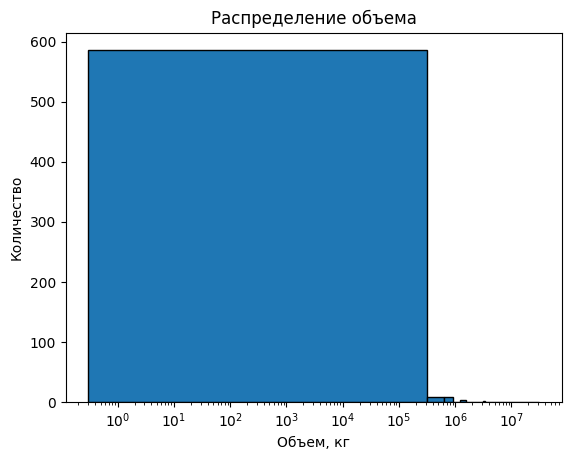

In [20]:
plt.hist(df_grouped['Объем, кг'], bins=100, edgecolor='black')
plt.xscale('log')
plt.xlabel('Объем, кг')
plt.ylabel('Количество')
plt.title('Распределение объема')
plt.show()

Упрощенное распределение по объёму, вертикальная шкала - логарифмическая

Оранжевая линия - медиана, нижняя грань "коробки" - квартиль 25%, верхняя грань - квартиль 75%

In [21]:
interpretation = """

      Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR 
                       
"""

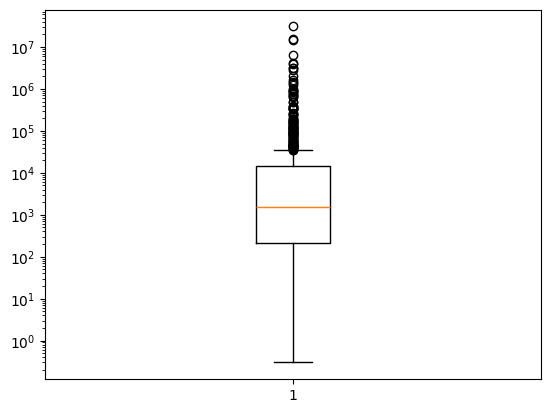

In [22]:
plt.boxplot(df_grouped['Объем, кг'])
plt.yscale('log')
plt.show()

In [ ]:
tttt = "ke666666666k"

In [ ]:
j = 2*tttt

In [ ]:
j